In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from google.colab import files
from google.colab.patches import cv2_imshow

In [ ]:
#loading the mnist data from keras datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
#shape of the numpy arrays
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [ ]:
#printing the 10th image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(x_train[10].shape)

(28, 28)


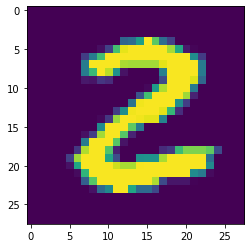

2


In [ ]:
#displaying the image
plt.imshow(x_train[25])
plt.show()

#print the coreesponding label
print(y_train[25])

In [ ]:
#image labels
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [ ]:
#unique value in y_train
print(np.unique(y_train))

#unique value in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
#we can use these labels as suck or we can also apply one hot encoding
#scaling the values
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
 #printing the 10th image
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
#building the neural network
# setting up some layers of the neural netowkr
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')

])

In [ ]:
#compiling the neural network
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [ ]:
 #training the neural network
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3034 - accuracy: 0.9129
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1394 - accuracy: 0.9582
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1023 - accuracy: 0.9695
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0830 - accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0681 - accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0588 - accuracy: 0.9810
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0506 - accuracy: 0.9836
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0446 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0390 - accuracy: 0.9872
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.034

In [ ]:
#accuracy on test data -
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 0.9753
0.9753000140190125


In [ ]:
print(x_test.shape)

(10000, 28, 28)


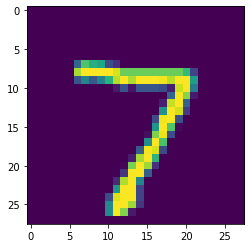

7


In [ ]:
#display first data point in x_test
plt.imshow(x_test[0])
plt.show()
print(y_test[0])

In [ ]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
print(y_pred.shape)
print(y_pred[0])

(10000, 10)
[2.4221023e-04 6.5868866e-04 6.3214326e-01 8.8042307e-01 4.2575422e-07
 4.1336557e-03 2.5961034e-08 9.9999905e-01 3.2042164e-02 2.3908384e-02]


In [ ]:
# model.predict gives the prediction probability of each class for the particular data point

In [ ]:
#converting the prediction probabilited to class labels
label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
#converting the prediction probabilites to class label for all test points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 5, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 959    0    2    2    2    6    5    2    1    1]
 [   0 1123    3    1    0    1    2    1    4    0]
 [   1    2 1000    5    2    3    2    8    8    1]
 [   0    0    1  987    1   14    0    3    2    2]
 [   0    0    4    0  961    0    6    4    0    7]
 [   2    0    0    7    1  874    3    0    4    1]
 [   3    3    1    1    2    7  939    0    2    0]
 [   0    6   10    2    0    0    0 1002    3    5]
 [   1    1    3    4    3   10    3    3  944    2]
 [   2    2    0    3   15    9    1    8    5  964]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

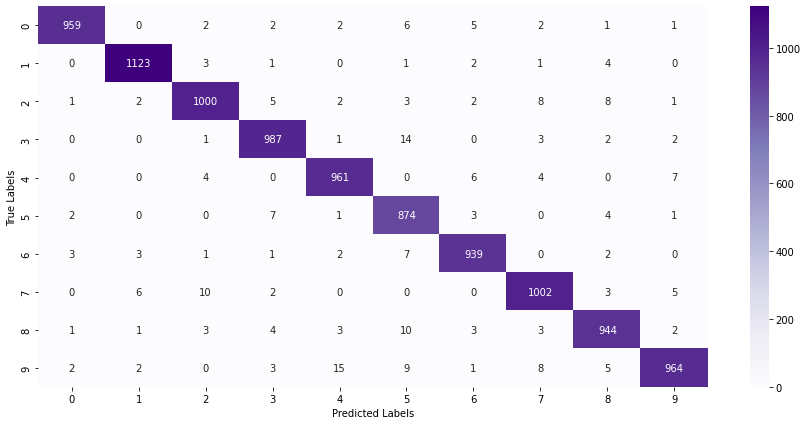

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot = True, fmt='d', cmap='Purples')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [ ]:
input_image_path = '/MNIST_digit.png'
input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
input_image.shape

(318, 318, 3)

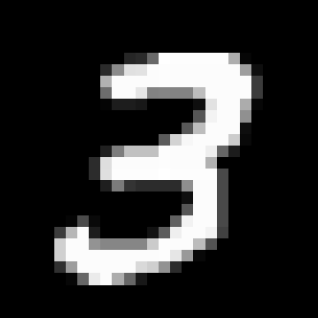

In [ ]:
cv2_imshow(input_image)

In [ ]:
grayscale = cv2.cvtColor(input_image ,cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(318, 318)

In [ ]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 43ms/step
[[1.3552479e-10 3.6195116e-04 8.9786462e-03 1.0000000e+00 7.9120088e-16
  7.3569191e-01 4.4108707e-18 1.6733053e-05 9.3863904e-01 5.9736080e-02]]


In [ ]:
input_pred_label = np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

3


predictive system


path of the image to be predicted: /mnist1.png


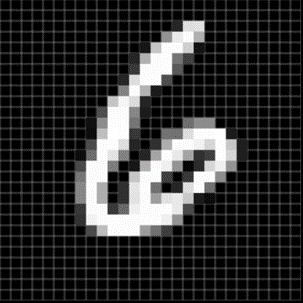

1/1 [==============================] - 0s 33ms/step
the hand written digit is recognised as  6


In [ ]:
input_image_path = input('path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image ,cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print('the hand written digit is recognised as ',input_pred_label )